<a href="https://colab.research.google.com/github/CarolineVicente/Machine_Learn/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [ ]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
identificacoes_treino.min()
identificacoes_treino.max()

np.uint8(9)

Exibição dos dados

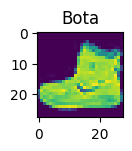

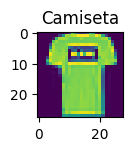

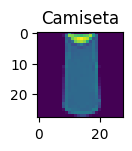

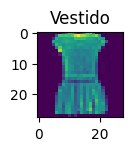

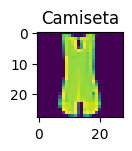

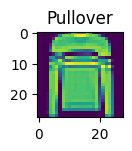

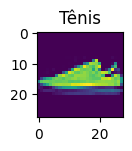

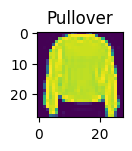

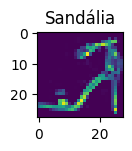

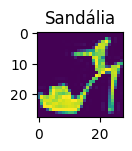

In [20]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

# plt.imshow(imagens_treino[0])
# plt.title(identificacoes_treino[0])
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
  plt.show()
  plt.colorbar


Normalizando as Imagens

In [17]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [ ]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=5, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7644 - loss: 0.6672 - val_accuracy: 0.8436 - val_loss: 0.4291
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8518 - loss: 0.4083 - val_accuracy: 0.8676 - val_loss: 0.3664
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8672 - loss: 0.3667 - val_accuracy: 0.8666 - val_loss: 0.3654
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8717 - loss: 0.3462 - val_accuracy: 0.8725 - val_loss: 0.3504
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8811 - loss: 0.3201 - val_accuracy: 0.8770 - val_loss: 0.3415


Salavando e carregando o modelo treinado

In [18]:
modelo.save('modelo.keras')
modelo_salvo = load_model('modelo.keras', custom_objects={'softmax_v2': tf.nn.softmax})

Vizualizando as acurácias de treino e validação por épocas

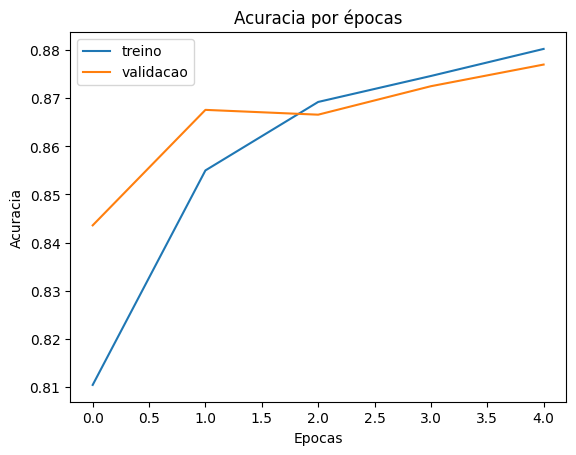

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por épocas')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend(['treino', 'validacao'])

Vizualizando as perdas de treino e validação por épocas

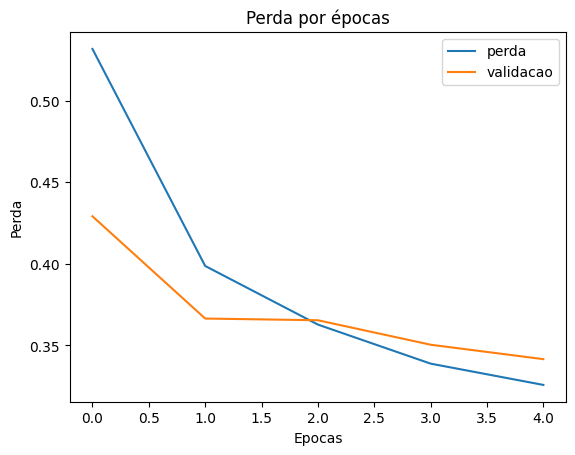

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.legend(['perda', 'validacao'])

Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[5]))
print('numero identificacao da imagem:', identificacoes_teste[5])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes_modelo_salvo[5]))
print('numero identificacao da imagem:', identificacoes_teste[5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste: 1
numero identificacao da imagem: 1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste: 1
numero identificacao da imagem: 1


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 47.3252
Perda do teste:  51.11642837524414
Acuracia do teste:  0.8549000024795532
